In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Loading the MNISt data base
## There are 1797 images of size 8x8 pixels in "grayscale"

inputs = (n_inputs, pixel_width, pixel_height) = (1797, 8, 8)
labels = (n_inputs) = (1797,)
X = (n_inputs, n_features) = (1797, 64)


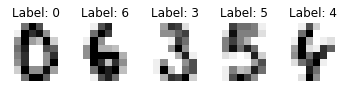

In [4]:
from sklearn import datasets

digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

print("inputs = (n_inputs, pixel_width, pixel_height) = " + str(inputs.shape))
print("labels = (n_inputs) = " + str(labels.shape))


# flatten the image
# the value -1 means dimension is inferred from the remaining dimensions: 8x8 = 64
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)
print("X = (n_inputs, n_features) = " + str(inputs.shape))


# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)


for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()


4


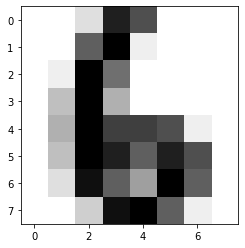

In [5]:
cartesian = digits.images
ind = np.random.randint(0,len(cartesian))
print(labels[ind])
plt.imshow(cartesian[np.random.randint(0,len(cartesian))], cmap=plt.cm.gray_r)

## Changing the dimensions of the images to Polar coordinates

In [6]:
import abel

In [10]:
CartImage = cartesian[3]
PolarImage, r_grid, theta_grid = abel.tools.polar.reproject_image_into_polar(CartImage)

In [11]:
print(CartImage.shape, PolarImage.shape, r_grid.shape, theta_grid.shape)

(8, 8) (6, 8) (6, 8) (6, 8)


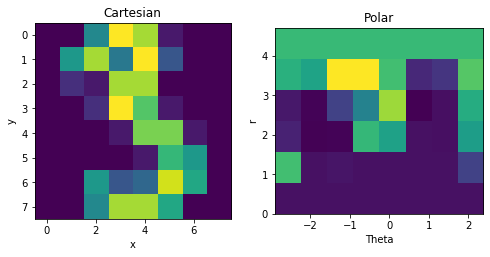

In [14]:
fig, axs = plt.subplots(1,2, figsize=(7,3.5))
axs[0].imshow(CartImage)
axs[1].imshow(PolarImage, extent=(np.min(theta_grid), np.max(theta_grid), np.min(r_grid), np.max(r_grid)))

axs[0].set_title('Cartesian')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

axs[1].set_title('Polar')
axs[1].set_xlabel('Theta')
axs[1].set_ylabel('r')

plt.tight_layout()
plt.show()


In [15]:
PolarData = np.zeros((len(inputs),48))
for i in range(len(inputs)):
    CartImage = inputs[i].reshape(8,8)
    PolarImage, r_grid, theta_grid = abel.tools.polar.reproject_image_into_polar(CartImage)
    PolarData[i,:] = PolarImage.reshape(-1)


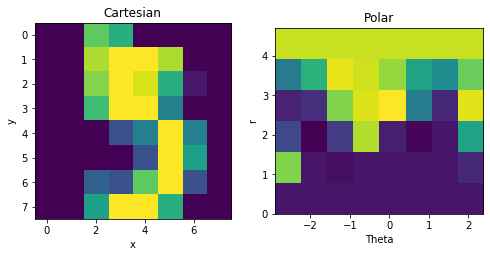

In [16]:
fig, axs = plt.subplots(1,2, figsize=(7,3.5))
axs[0].imshow(inputs[5].reshape(8,8))
axs[1].imshow(PolarData[5].reshape(6,8), extent=(np.min(theta_grid), np.max(theta_grid), np.min(r_grid), np.max(r_grid)))

axs[0].set_title('Cartesian')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

axs[1].set_title('Polar')
axs[1].set_xlabel('Theta')
axs[1].set_ylabel('r')

plt.tight_layout()
plt.show()


In [17]:
# Loading up the neural network and readying the data

In [18]:
import NNclassification as NNC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 

# One-hot in numpy (from lecture notes week 41)
def to_categorical_numpy(integer_vector):
    n_inputs = len(integer_vector)
    n_categories = np.max(integer_vector) + 1
    onehot_vector = np.zeros((n_inputs, n_categories))
    onehot_vector[range(n_inputs), integer_vector] = 1
    
    return onehot_vector

def accuracy(y,y_pred):
    y = np.argmax(y, axis=1) #Returns one-hot encoded vectors back to class integers
    acc = np.sum(y==y_pred)/len(y)
    return acc



In [19]:
X = PolarData
Y = to_categorical_numpy(labels)
n_features = X.shape[1]
n_categories = Y.shape[1]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [20]:
X_train, X_test = X_train.T, X_test.T
Y_train, Y_test = Y_train.T, Y_test.T

In [21]:
hidden_layers = [('relu',0),('relu',0.001),'softmax']
layer_dims=[n_features,20,10,n_categories]

NNclassifier = NNC.NN(layer_dims=layer_dims, hidden_layers=hidden_layers, cost_function='CrossEntropy', optimization_method = "SGDM", 
                      batch_size = 32, max_epoch=1000, verbose=1, learning_rate=0.05)

In [22]:
NNclassifier.fit(X_train, Y_train)

Initilizing Weights...
Starting Training...
Cost function after epoch 100: 0.17256434598060316
Cost function after epoch 200: 0.13619390723055244
Cost function after epoch 300: 0.05958780168185118
Cost function after epoch 400: 0.039493676660730545
Cost function after epoch 500: 0.6851623864565461
Cost function after epoch 600: 0.030889006763512864
Cost function after epoch 700: 0.22040439548042368
Cost function after epoch 800: 0.02519000187769515
Cost function after epoch 900: 0.06928294326986215
Cost function after epoch 1000: 0.02668337411512791


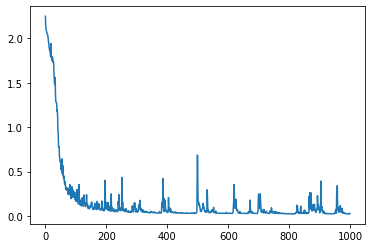

In [23]:
plt.plot(NNclassifier.costs)

In [24]:
Y_tilde = NNclassifier.predict(X_train)
Y_pred = NNclassifier.predict(X_test)

In [25]:
accuracy(Y_train.T, Y_tilde)

0.9909533750869868

In [26]:
accuracy(Y_test.T, Y_pred)

0.9222222222222223

In [27]:
# It did not give any better results than just having the cartesian coordinates. There could be an issue with the 
# dimenstionality reduction from (8,8) to (6,8), i.e removing 25% of the datapoints. The computation speed difference 
# is negligable as the network trains very quickly with promising results. The shift towards polar coordinates could 
# however be more interesting in other datasets.
# The hypothesis of using polar coordinates was thatthe "circular" motions of handwriting could yield any help
# for the network to train efficiently.  

In [35]:
# Make 3d Plot
#%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection ='3d')

surf = ax.plot_surface(r_grid, theta_grid, PolarImage, cmap = plt.cm.jet)
ax.set_xlabel('r')
ax.set_ylabel('theta')
ax.set_zlabel('Z')
plt.show()